In [1]:
# imports
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import sys
import seaborn as sns
import matplotlib as mpl

# Add the project root to Python path dynamically
# This finds the project root by looking for setup.py
current_dir = Path.cwd()
project_root = None

# Look for setup.py starting from current directory and going up
for parent in [current_dir] + list(current_dir.parents):
    if (parent / "setup.py").exists():
        project_root = parent
        break

if project_root is None:
    # Fallback: assume we're in src/example_files and go up 2 levels
    project_root = Path(__file__).parent.parent.parent if '__file__' in globals() else current_dir.parent.parent

sys.path.insert(0, str(project_root))

# Now we can import from src
from src.core_functionality.data_processing import DataProcessingCSV
from src.core_functionality.spectrum import Spectrum
from src.core_functionality.baseline_correction import BaselineCorrection


print(f"All imports successful! Project root: {project_root}")

All imports successful! Project root: c:\Users\alw7s\Git\PyMESpec


In [2]:
# Path to DRIFTS data
path = project_root / "src" / "example_files" / "CeO2_DRIFTS_Baseline_Correction" 


In [3]:
# Names of the CSV columns to read
# csv_frequency_column = "frequency"
# csv_intensity_column = "intensity"
# The initial and final rows to investigate (-1 means the last row with data)
csv_row_num_start = 1
csv_row_num_end = -1
# The spectral coordinate range to investigate (the subset of frequency values)
spectral_coordinate_start = 1250
spectral_coordinate_end = 3999
# Of all the data points collected this is the range of frames to investigate
starting_frame = 0
ending_frame = -1
# This is the number of data points collected per pulse in this experiment
# data_per_pulse = 800
max_iters = 100

print(f"Looking for data in: {path}")
print(f"Path exists: {path.exists()}")

Looking for data in: c:\Users\alw7s\Git\PyMESpec\src\example_files\CeO2_DRIFTS_Baseline_Correction
Path exists: True


In [4]:
data_processor = DataProcessingCSV(
    in_dir=path,
    # csv_frequency_column=csv_frequency_column,
    # csv_intensity_column=csv_intensity_column,
    csv_row_num_start=csv_row_num_start,
    csv_row_num_end=csv_row_num_end,
)

spectra = data_processor.get_spectra()

print(f" Number of spectra: {len(spectra)}")

 Number of spectra: 7


In [5]:
# Slice the section of the spectra that we actually want to investigate
spectra = spectra.isolate_spectra_sections([(spectral_coordinate_start, spectral_coordinate_end)])
# spectra = spectra[4:]

In [6]:
# Let's create a custom class called CustomSinBaselineCorrection which inherits from BaselineCorrection
# This class will implement a custom baseline correction method where we define a sinusoidal baseline
# This is not a very practical baseline correction method, but it serves to illustrate how to create a custom baseline correction class.

# The only function that we need to implement is get_baseline which takes a Spectrum object and returns a numpy array 
# representing the baseline for that spectrum.

class CustomSinBaselineCorrection(BaselineCorrection):
    def __init__(self):
        super().__init__()

    def get_baseline(self, spectrum: Spectrum) -> np.ndarray:
        # Custom baseline correction logic
        # For demonstration, we'll just return a sinusoidal baseline
        x = np.arange(len(spectrum.frequencies))
        baseline = np.sin(x / 50) * 0.2 + 0.1
        return baseline


In [7]:
custom_sin_baseline = CustomSinBaselineCorrection()
package_spectra = custom_sin_baseline.get_baseline_corrected_spectra(spectra)

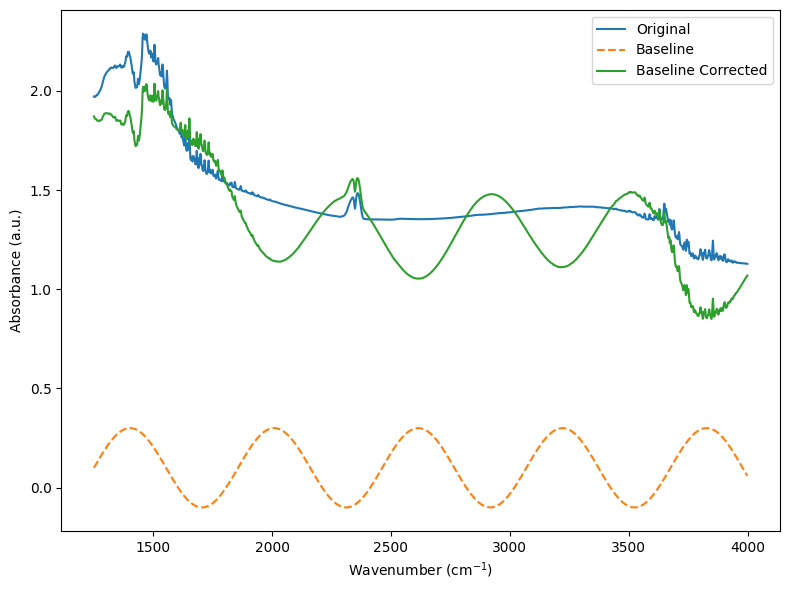

In [8]:
# plots a spectrum to show the baseline correction works
target_spectrum = spectra[0]
baseline_corrected_spectrum = package_spectra[0]
baseline = custom_sin_baseline.get_baseline(target_spectrum)
plt.figure(1, figsize=(8,6))
plt.plot(target_spectrum.frequencies, target_spectrum.intensities , label="Original")
plt.plot(target_spectrum.frequencies, baseline, label="Baseline", linestyle='--')
plt.plot(baseline_corrected_spectrum.frequencies, baseline_corrected_spectrum.intensities, label="Baseline Corrected")


plt.xlabel("Wavenumber (cm$^{-1}$)")
plt.ylabel("Absorbance (a.u.)")
plt.legend()
plt.tight_layout()
plt.show()